This is my learn example of create useful (but very slow) model with cnn.
Detector - naive and simple function find car on the photo

# 1. Prepare data

In [163]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import cv2
import matplotlib.patches as mp

from keras.datasets import cifar10
from sklearn.utils import shuffle   
from matplotlib import pyplot as plt
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

import warnings
warnings.filterwarnings('ignore')

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

[8]


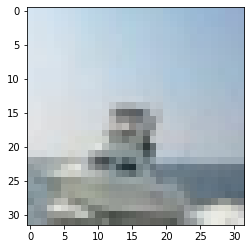

In [27]:
plt.imshow(x_train[100])
print(y_train[100])


In [28]:
def plot_images(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

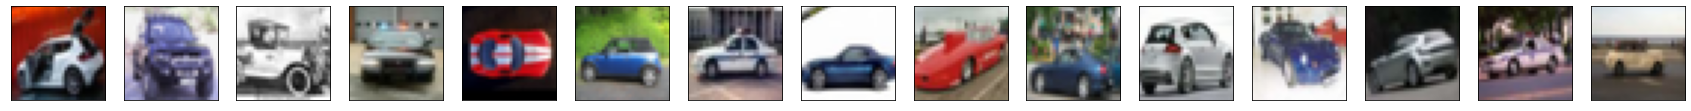

In [29]:
plot_images(x_test[np.where(y_test == 1)[0][:15]])

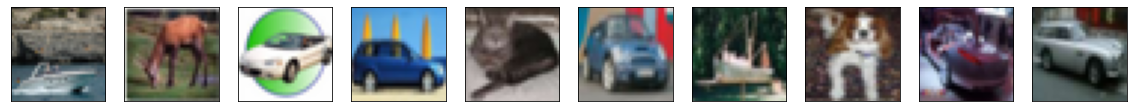

[0. 0. 1. 1. 0. 1. 0. 0. 1. 1.]


In [30]:
# find and shuffle not-car indexes
otrs_inds = np.where(y_train!=1)[0]
np.random.shuffle(otrs_inds)

cars_train = x_train[np.where(y_train==1)[0]].copy() # cars part train x
otrs_train = x_train[otrs_inds].copy() # not-cars part train x

imgs_train = np.concatenate((cars_train, otrs_train[:cars_train.shape[0]]))
y_imgs_train = np.concatenate((np.ones(cars_train.shape[0]), np.zeros(cars_train.shape[0])))

inds = np.arange(imgs_train.shape[0])
np.random.shuffle(inds)

imgs_train = imgs_train[inds]
y_imgs_train = y_imgs_train[inds]

plot_images(imgs_train[100:110])
print(y_imgs_train[100:110])

and test data, the same way

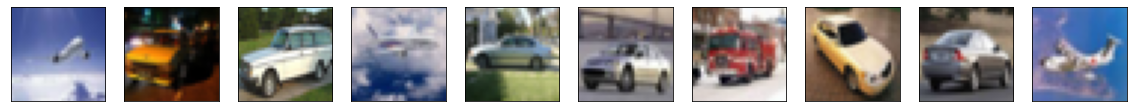

[0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [32]:
# find and shuffle not-car indexes
otrs_inds = np.where(y_test!=1)[0]
np.random.shuffle(otrs_inds)

cars_test = x_test[np.where(y_test==1)[0]].copy() # cars part train x
otrs_test = x_test[otrs_inds].copy() # not-cars part train x

imgs_test = np.concatenate((cars_test, otrs_test[:cars_test.shape[0]]))
y_imgs_test = np.concatenate((np.ones(cars_test.shape[0]), np.zeros(cars_test.shape[0])))

inds = np.arange(imgs_test.shape[0])
np.random.shuffle(inds)

imgs_test = imgs_test[inds]
y_imgs_test = y_imgs_test[inds]

plot_images(imgs_test[100:110])
print(y_imgs_test[100:110])

# 2. Train model

In [39]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 128)       

In [40]:
%%time
history = model.fit(imgs_train, y_imgs_train, batch_size=32, epochs=15, validation_data=[imgs_test, y_imgs_test])

Epoch 1/15
313/313 [==============================] - 11s 34ms/step - loss: 0.6856 - accuracy: 0.7838 - val_loss: 0.3116 - val_accuracy: 0.8740
Epoch 2/15
313/313 [==============================] - 11s 34ms/step - loss: 0.3032 - accuracy: 0.8766 - val_loss: 0.2830 - val_accuracy: 0.8895
Epoch 3/15
313/313 [==============================] - 11s 35ms/step - loss: 0.2562 - accuracy: 0.8948 - val_loss: 0.2932 - val_accuracy: 0.8875
Epoch 4/15
313/313 [==============================] - 11s 36ms/step - loss: 0.2260 - accuracy: 0.9117 - val_loss: 0.2717 - val_accuracy: 0.9010
Epoch 5/15
313/313 [==============================] - 11s 34ms/step - loss: 0.1985 - accuracy: 0.9226 - val_loss: 0.2642 - val_accuracy: 0.8885
Epoch 6/15
313/313 [==============================] - 11s 36ms/step - loss: 0.1705 - accuracy: 0.9334 - val_loss: 0.2796 - val_accuracy: 0.8960
Epoch 7/15
313/313 [==============================] - 10s 33ms/step - loss: 0.1464 - accuracy: 0.9429 - val_loss: 0.2514 - val_accuracy:

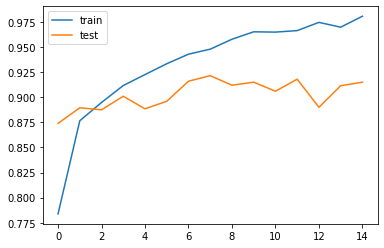

In [41]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend(loc='best')
plt.show()

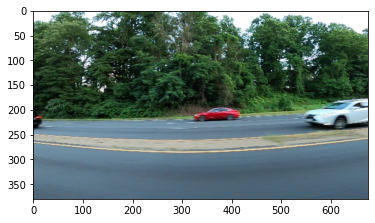

In [81]:
some_img = plt.imread('../../another_datasets/111.jpg')
plt.imshow(some_img)

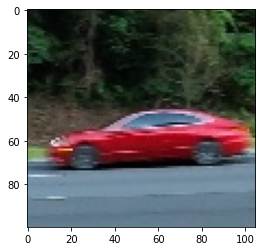

In [82]:
plt.imshow(some_img[150:250, 315:420])

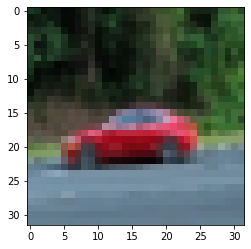

[[0.98593605]]


In [83]:
some_img = some_img[150:250, 300:450]
some_img = cv2.resize(some_img,
                 (32, 32),
                 interpolation = cv2.INTER_AREA)

plt.imshow(some_img)
plt.show()

print(model.predict(some_img.reshape(-1,32,32,3)))  # model says its a car

just for know that model can recognize on non-cifar10 data

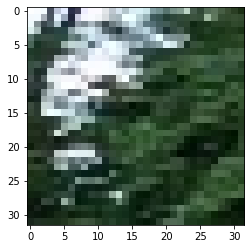

[[0.11543411]]


In [84]:
an_img = plt.imread('../../another_datasets/111.jpg')
plt.imshow(an_img[100:132, 100:132])
plt.show()
print(model.predict(an_img[100:132, 100:132].reshape(-1,32,32,3))) # model says its not a car

# 3. Detector function

### Idea - split whole the image into intersecting square frames 32x32 with some step of mooving frame
yes - there will be too many squares; yeah - its gonna be slow

(380, 676, 3) stock size
(170,)  - number of squares 32x32 split image
(114, 202, 3) transform size


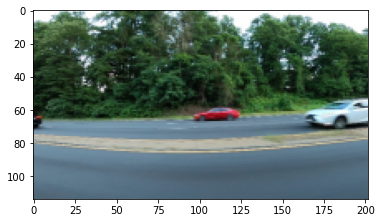

In [249]:
N = M = 32 # width frame
img = plt.imread('../../another_datasets/111.jpg')
print(img.shape, 'stock size')

# decrease image resolution
img = cv2.resize(img,
                 (int(img.shape[1] * .3), int(img.shape[0] * .3)),
                 interpolation = cv2.INTER_AREA)
plt.imshow(img)

# split
tiles = np.array([img[x:x+M,y:y+N] for x in range(0,img.shape[0],M-20) for y in range(0,img.shape[1],N-20)])

print(tiles.shape, ' - number of squares 32x32 split image')
print(img.shape, 'transform size')

#### how it splits

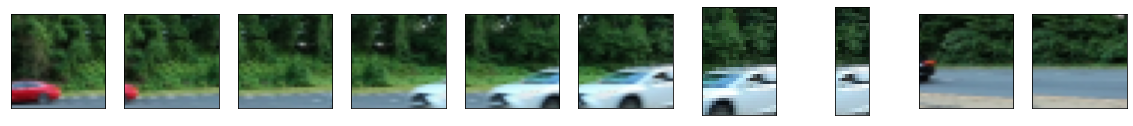

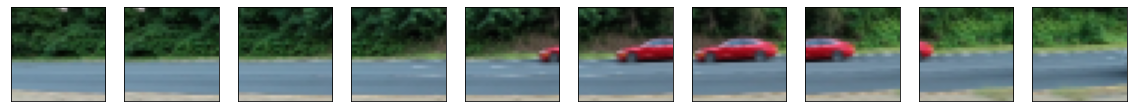

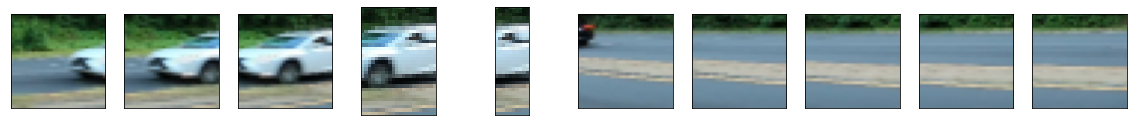

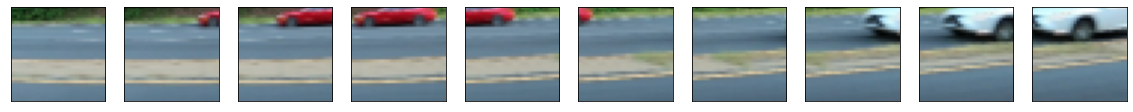

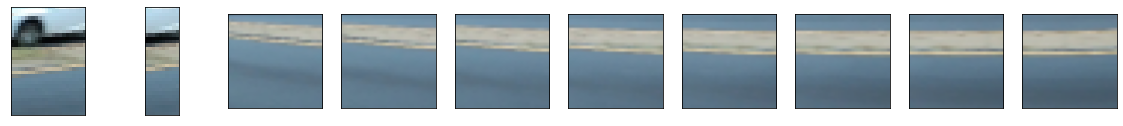

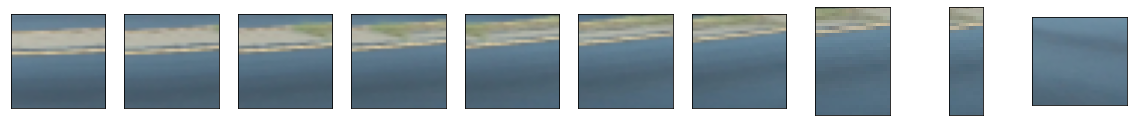

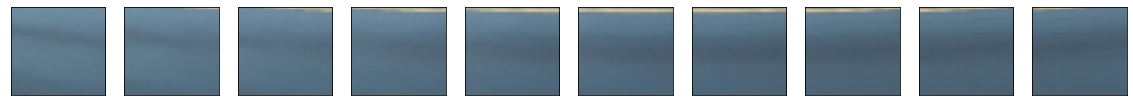

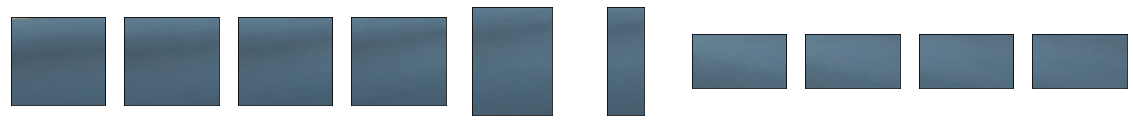

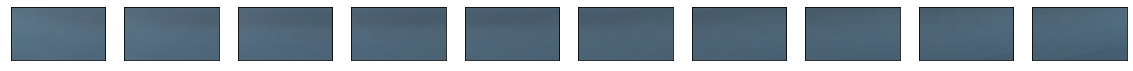

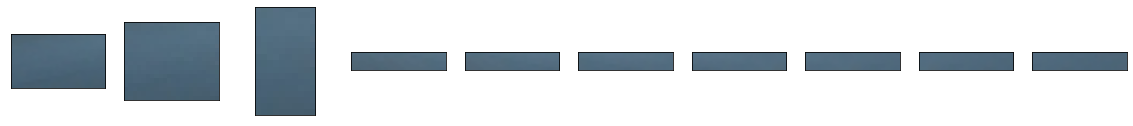

In [127]:
for i in range(60, 160, 10):
    plot_images(tiles[i:i+10])

### how it has to be

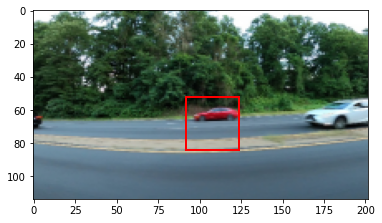

In [180]:
imgt = img.copy()

fig, ax = plt.subplots()

# imgt[50:82, 92:124] += 50

# plt.imshow(imgt[50:82, 92:124])

plt.imshow(imgt)

mpatch = mp.Rectangle((92,52),32,32,linewidth=3, edgecolor='red',facecolor="none",lw=2)
ax.add_patch(mpatch)

In [181]:
model.predict(imgt[50:82, 92:124].reshape(-1,32,32,3))

array([[0.9996375]], dtype=float32)

just for know that its possible)

### write algorithm

4
Wall time: 12.2 s


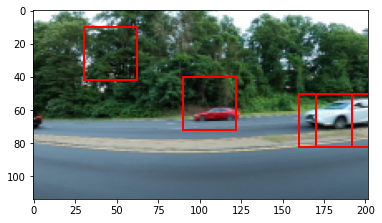

In [188]:
%%time

t = 0
fig, ax = plt.subplots()
for x in range(0, imgt.shape[0], 10):
    for y in range(0, imgt.shape[1], 10):
        crop = imgt[x:x+M,y:y+N]
#         plt.imshow(crop)
        
        if crop.shape[0]*crop.shape[1]==1024 and model.predict(crop.reshape(-1,32,32,3)) > .985:
#             crop += 10
            t += 1
            
            mpatch = mp.Rectangle((y,x),N,N,linewidth=1, edgecolor='red',facecolor="none",lw=2)
            ax.add_patch(mpatch)
        
plt.imshow(imgt)
print(t)

In [205]:
%%time
rects = [
    (y,x) for x in range(0, imgt.shape[0], 8) for y in range(0, imgt.shape[1], 8)
    
    if imgt[x:x+M,y:y+N].shape[0]*imgt[x:x+M,y:y+N].shape[1]==1024
    and
    model.predict(imgt[x:x+M,y:y+N].reshape(-1,32,32,3)) > .985
]

Wall time: 18.3 s


In [203]:
rects # list of coordinates

[(88, 16), (152, 16), (160, 16), (160, 48), (168, 48), (88, 56)]

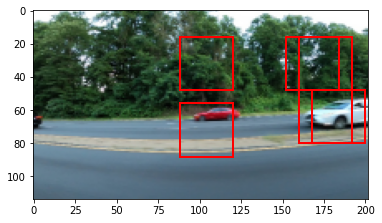

In [204]:
fig, ax = plt.subplots()

for position in rects:
    mpatch = mp.Rectangle(position, N,N,linewidth=1, edgecolor='red',facecolor="none",lw=2)
    ax.add_patch(mpatch)
    
plt.imshow(imgt)

In [254]:
resize_function = lambda img: cv2.resize(img, (int(img.shape[1] * .3), int(img.shape[0] * .3)), interpolation = cv2.INTER_AREA)

def detector(ax, img, N=32, M=32, step=10):
    
    img = np.array(img)
    
    positions = np.array(
        [
        (y,x) for x in range(0, img.shape[0], step) for y in range(0, img.shape[1], step)

        if (img[x:x+M,y:y+N].shape[0] * img[x:x+M,y:y+N].shape[1] == 1024 and img[x:x+M,y:y+N].shape[2]==3)
            and model.predict(img[x:x+M,y:y+N].reshape(-1,32,32,3)) > .989
    ]
    )
    
    for pos in positions:
        mpatch = mp.Rectangle(pos, N,N,linewidth=1, edgecolor='red',facecolor="none",lw=2)
        ax.add_patch(mpatch)

# 5. more examples

In [255]:
dir_imgs = [
    '../../another_datasets/car_objects_detection/data/training_images/vid_4_940.jpg',
    '../../another_datasets/car_objects_detection/data/training_images/vid_4_2140.jpg',
    '../../another_datasets/car_objects_detection/data/training_images/vid_4_3120.jpg',
    '../../another_datasets/car_objects_detection/data/training_images/vid_4_3140.jpg',
    '../../another_datasets/car_objects_detection/data/training_images/vid_4_2060.jpg',
]

examples = [resize_function(plt.imread(d)) for d in dir_imgs]

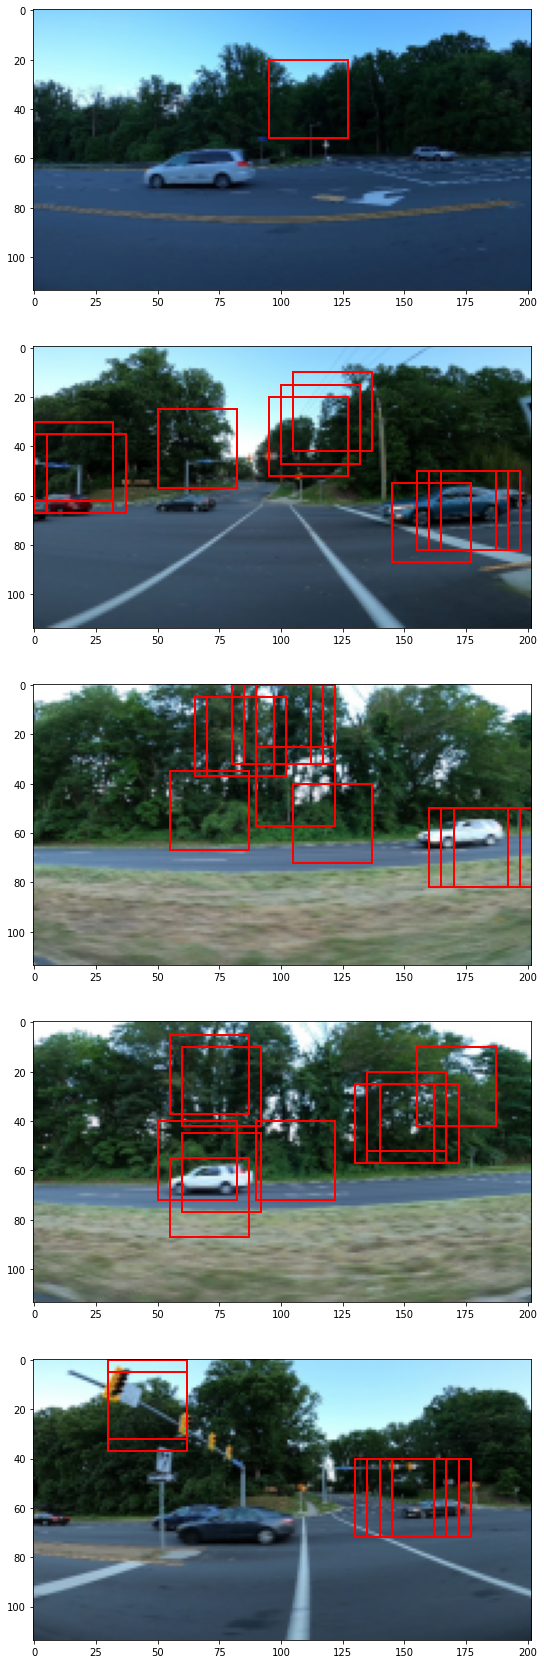

Wall time: 3min 41s


In [256]:
%%time
fig, ax = plt.subplots(ncols=1, nrows=5)
fig.set_figwidth(30)  
fig.set_figheight(30)   

for i in range(5):
    ax[i].imshow(examples[i])
    detector(ax[i], examples[i], step=5)
    
plt.show()

# Resume

- The model is too slow (as expected)
- But it has written almost without any knowns about how its implemented in the real detectors
- The model recognize where exactly the car, in the same time model sees the car in the trees)0)

## Findings, ideas

+ Partly the problem is the dataset and number of epochs (30), but it was written on the laptop
+ Overall learning curves don't look good
+ Also, it seems obviously that split of image gotta be calculate in parallel